## Labb 1

Syftet med den här laborationen är att använda verktygen du lärt dig i Python för att implementera en
förenklad maskininlärningsalgoritm.

I den här laborationen finns (simulerad) data på Pichus och Pikachus längder och bredder. 

Du ska skapa en algoritm som baserat på den givna datan kunna avgöra om en ny data ska klassificeras som Pichu eller
Pikachu.


In [9]:
# Funktion som rensar data från pichu- och pikachufiler
import numpy as np

def cleaned_files(file_path, label):
    clean_files = []
    with open(file_path, "r") as file:
        for line in file:
            # Hoppar över raden om den innehåller width eller height
            if "width (cm)" in line or "height (cm)" in line:
                continue
            # Tar bort parenteser och delar raden vid kommatecken för att separera decimaltalen
            rows = line.strip().strip("()").split(",")

            # Konvertera decimaltalen till flyttal och avrunda dem till två decimaler.
            x = round(float(rows[0]), 2)
            y = round(float(rows[1]), 2)
            # Lägger till om det är pichu eller pikachu.
            clean_files.append([x, y, label])
    return clean_files

# Sätter etiketter för Pichu och Pikachu baserat på filnamn
pichu_label = "Pichu"
pikachu_label = "Pikachu"

# Använder funktionen för att rensa filerna och lägger till etiketterna från ovan
Pichu_data = np.array(cleaned_files("../data/pichu.txt", pichu_label))
Pikachu_data = np.array(cleaned_files("../data/pikachu.txt", pikachu_label))

# skriver ut så vi ser hur det ser ut.
Pichu_data
Pikachu_data

array([['18.14', '44.95', 'Pikachu'],
       ['26.65', '41.5', 'Pikachu'],
       ['26.18', '39.38', 'Pikachu'],
       ['24.44', '40.18', 'Pikachu'],
       ['21.2', '36.21', 'Pikachu'],
       ['25.69', '37.25', 'Pikachu'],
       ['19.34', '38.38', 'Pikachu'],
       ['23.22', '40.88', 'Pikachu'],
       ['23.44', '37.3', 'Pikachu'],
       ['29.45', '37.2', 'Pikachu'],
       ['28.51', '35.71', 'Pikachu'],
       ['21.16', '41.31', 'Pikachu'],
       ['24.01', '37.29', 'Pikachu'],
       ['20.14', '44.05', 'Pikachu'],
       ['28.95', '43.6', 'Pikachu'],
       ['28.45', '35.71', 'Pikachu'],
       ['21.58', '37.38', 'Pikachu'],
       ['25.67', '41.69', 'Pikachu'],
       ['25.31', '37.14', 'Pikachu'],
       ['19.83', '36.32', 'Pikachu'],
       ['27.15', '44.36', 'Pikachu'],
       ['24.47', '40.71', 'Pikachu'],
       ['27.34', '39.73', 'Pikachu'],
       ['24.36', '42.85', 'Pikachu'],
       ['18.01', '43.07', 'Pikachu'],
       ['21.89', '36.9', 'Pikachu'],
       ['18.23', '

In [10]:
def output_cleaned_file(file_path, data):
    with open(file_path, "w") as file:
        for i, row in enumerate(data):
            x, y, type = row
            file.write(f"({x:.2f}, {y:.2f}, '{type}')\n")

output_cleaned_file("../data/pichu_cleanedup.txt", Pichu_data)
output_cleaned_file("../data/pikachu_cleanedup.txt", Pikachu_data)

ValueError: Unknown format code 'f' for object of type 'numpy.str_'

In [ ]:
# Här finns filen
test_points_path = "../data/test_points.txt"

# Hit ska den skrivas ut
TP_output_path = "../data/TP_cleanedup.txt"
rounded_TP = []

# Läser från och skriver till dessa ställen.
with open(test_points_path, "r") as TP_file, open(TP_output_path, 'w') as TP_output_file:
    for line in TP_file:
        # Tar bort alla mellanslag
        cleaned_TP = line.replace(' ', '')
        # Delar upp strängen i en lista
        points_list = cleaned_TP.split('),(')

        for point_str in points_list:
            
            # Ta bort parenteser och splitta vid kommatecken
            x, y = map(float, point_str.strip('()').split(','))
            # map() är en inbyggd Python-funktion som används för att tillämpa en given funktion på varje element i en sekvens 
            # (till exempel en lista eller en tuple) och returnera en ny sekvens av resultaten.
        

            # Lägger till punkterna i den avrundade listan
            rounded_TP.append((x, y))  # Lägger till som en tupel istället för en formaterad sträng

        # Skriver varje punkt i rounded_TP till filen
        for point in rounded_TP:
            TP_output_file.write(f"({point[0]}, {point[1]})\n")

    # Skrier ut så vi ser hur det ser ut.
    print(rounded_TP)

[(25.0, 35.0), (15.0, 14.0), (26.0, 30.0), (22.0, 45.0)]


In [ ]:
import matplotlib.pyplot as plt

# Funktion för att läsa in x, y och label från filerna
def read_data(file_path):
    x_values = []
    y_values = []
    labels = []

    with open(file_path, 'r') as file:
        for line in file:
           
           #Tar bort parenteser och radbrytningar och splittar vid ,-tecken
            line = line.strip('()\n ')
            values = line.split(',')

            # Kontrollerar om raden innehåller exakt två värden
            if len(values) >= 2:
                x, y = map(float, values[:2])  # Tar ut de första två värdena (x, y) med två decimaler.
                x_values.append(x)
                y_values.append(y)

                # Finns tre värden så läggs etiketten (pokemon typ) till.
                if len(values) == 3:
                    label = values[2].strip()
                    labels.append(label)

    return x_values, y_values, labels

# Funktion för scatter
def plot_scatter(x, y, label, color):
    plt.scatter(x, y, label=label, color=color)

def main():

    # Läser in data för Pichu, Pikachu och Test point filerna
    pichu_x, pichu_y, pichu_labels = read_data("../data/pichu_cleanedup.txt")
    pikachu_x, pikachu_y, pikachu_labels = read_data("../data/pikachu_cleanedup.txt")
    TP_format_x, TP_format_y, TP_labels = read_data("../data/TP_cleanedup.txt")

    '''
    # Kontrollerar om data har lästs in korrekt
    print("Pichu X:", pichu_x)
    print("Pichu Y:", pichu_y)
    print("Pichu Labels:", pichu_labels)

    print("Pikachu X:", pikachu_x)
    print("Pikachu Y:", pikachu_y)
    print("Pikachu Labels:", pikachu_labels)

    print("Test Points X:", TP_format_x)
    print("Test Points Y:", TP_format_y)
    print("test_point Label:", TP_labels)'''
    
    # Plottar punkt-funktionerna och sätter label(legend namnen) och vilken färg punkterna ska ha.
    plt.scatter(pichu_x, pichu_y, label="Pichu Function", color= '#c8cf0a')
    plt.scatter(pikachu_x, pikachu_y, label="Pikachu Function", color= '#085bcf')
    plt.scatter(TP_format_x, TP_format_y, label="Test Points", color='#cf0a0a')

    # Sätter titel och etiketter för respektive axel och graftitel
    plt.title("Plotting Testdata against Pichu- and Pikachudata")
    plt.xlabel("Width")
    plt.ylabel("Height")

    # Använder labeln som finns i scatter så behöver inte fylla i mer.
    plt.legend()
    
    # Visa grafen
    plt.show()

# Anropa main-funktionen
main()

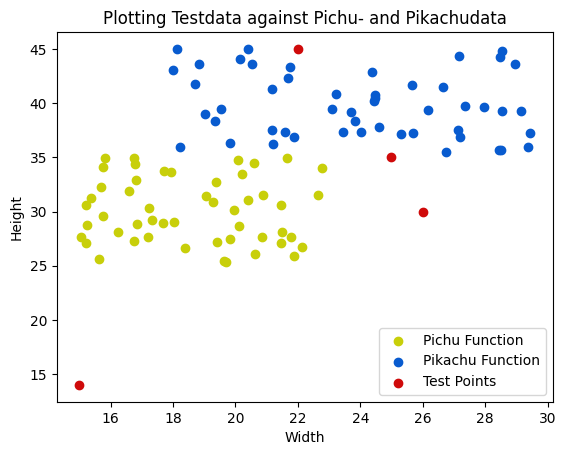

In [ ]:
import matplotlib.pyplot as plt

# Funktion för att läsa in x, y och label från filerna
def read_data(file_path):
    x_values = []
    y_values = []
    labels = []

    with open(file_path, 'r') as file:
        for line in file:
           
           #Tar bort parenteser och radbrytningar och splittar vid ,-tecken
            line = line.strip('()\n ')
            values = line.split(',')

            # Kontrollerar om raden innehåller exakt två värden
            if len(values) >= 2:
                x, y = map(float, values[:2])  # Tar ut de första två värdena (x, y) med två decimaler.
                x_values.append(x)
                y_values.append(y)

                # Finns tre värden så läggs etiketten (pokemon typ) till.
                if len(values) == 3:
                    label = values[2].strip()
                    labels.append(label)

    return x_values, y_values, labels

# Funktion för scatter
def plot_scatter(x, y, label, color):
    plt.scatter(x, y, label=label, color=color)

def main():

    # Läser in data för Pichu, Pikachu och Test point filerna
    pichu_x, pichu_y, pichu_labels = read_data("../data/pichu_cleanedup.txt")
    pikachu_x, pikachu_y, pikachu_labels = read_data("../data/pikachu_cleanedup.txt")
    TP_format_x, TP_format_y, TP_labels = read_data("../data/TP_cleanedup.txt")

    '''
    # Kontrollerar om data har lästs in korrekt
    print("Pichu X:", pichu_x)
    print("Pichu Y:", pichu_y)
    print("Pichu Labels:", pichu_labels)

    print("Pikachu X:", pikachu_x)
    print("Pikachu Y:", pikachu_y)
    print("Pikachu Labels:", pikachu_labels)

    print("Test Points X:", TP_format_x)
    print("Test Points Y:", TP_format_y)
    print("test_point Label:", TP_labels)'''
    
    # Plottar punkt-funktionerna och sätter label(legend namnen) och vilken färg punkterna ska ha.
    plt.scatter(pichu_x, pichu_y, label="Pichu Function", color= '#c8cf0a')
    plt.scatter(pikachu_x, pikachu_y, label="Pikachu Function", color= '#085bcf')
    plt.scatter(TP_format_x, TP_format_y, label="Test Points", color='#cf0a0a')

    # Sätter titel och etiketter för respektive axel och graftitel
    plt.title("Plotting Testdata against Pichu- and Pikachudata")
    plt.xlabel("Width")
    plt.ylabel("Height")

    # Använder labeln som finns i scatter så behöver inte fylla i mer.
    plt.legend()
    
    # Visa grafen
    plt.show()

# Anropa main-funktionen
main()
#  detta kan användas för att kontrollera om Python-scriptet körs direkt eller om det importeras som en modul i ett annat script
#if __name__ == "__main__":
#    main()


C:\Users\Sandra\AppData\Local\Temp\ipykernel_44684\1988239503.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, label=label, c=color)


Testpunkt 1: Närmaste Pichu-punkt är 2.44, och närmaste Pikachu-punkt är 1.83 från testpunkt. Ergo är testpunkt 1 en: Pikachu

Testpunkt 2: Närmaste Pichu-punkt är 11.66, och närmaste Pikachu-punkt är 22.21 från testpunkt. Ergo är testpunkt 2 en: Pichu

Testpunkt 3: Närmaste Pichu-punkt är 3.68, och närmaste Pikachu-punkt är 5.56 från testpunkt. Ergo är testpunkt 3 en: Pichu

Testpunkt 4: Närmaste Pichu-punkt är 10.03, och närmaste Pikachu-punkt är 1.59 från testpunkt. Ergo är testpunkt 4 en: Pikachu

Testpunkt 1: Närmast Pichu-punkt är på avstånd 2.44. Närmast Pikachu-punkt är på avstånd 1.83.
Sample with (width, height): (25.0, 35.0) classified as Pikachu
Testpunkt 2: Närmast Pichu-punkt är på avstånd 11.66. Närmast Pikachu-punkt är på avstånd 22.21.
Sample with (width, height): (15.0, 14.0) classified as Pichu
Testpunkt 3: Närmast Pichu-punkt är på avstånd 3.68. Närmast Pikachu-punkt är på avstånd 5.56.
Sample with (width, height): (26.0, 30.0) classified as Pichu
Testpunkt 4: Närma

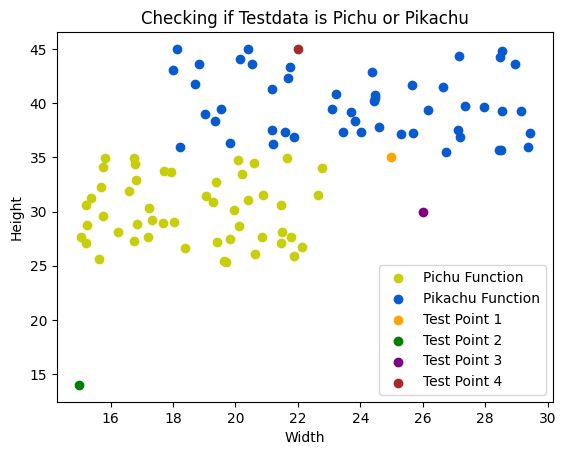

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Funktion för att läsa in x, y och label från filerna
def read_data(pokemon_clean):
    x_values = []
    y_values = []
    labels = []

    with open(pokemon_clean, 'r') as pokemon_cleaned:
        for line in pokemon_cleaned:
           
           #Tar bort parenteser och radbrytningar och splittar vid ,-tecken
            line = line.strip('()\n ')
            values = line.split(',')

            # Kontrollerar om raden innehåller exakt två värden
            if len(values) >= 2:
                x, y = map(float, values[:2])  # Tar ut de första två värdena (x, y) med två decimaler.
                x_values.append(x)
                y_values.append(y)

                # Finns tre värden så läggs etiketten (pokemón typ) till.
                if len(values) == 3:
                    label = values[2].strip()
                    labels.append(label)

    # Används för att skapa tuples med dessa tre variabler. 
    #Dessa variabler används sedan för att hämta x-värden, y-värden och etiketter för Pichu, Pikachu och testpunkter i resten av koden.
    return np.array(x_values), np.array(y_values), labels

# Funktion för scatter
def plot_scatter(x, y, label, color=None):
    # color=None: Valfri parameter som specificerar färgen på punkterna. 
    # Om ingen färg anges (dvs. color är None), kommer scatter-plotten att använda standardfärg. Annars används den specificerade färgen.
    if color is not None:
        plt.scatter(x, y, label=label, c=color)
    else:
        plt.scatter(x, y, label=label)

def distances_and_type(TP_format_x, TP_format_y, pichu_x, pichu_y, pikachu_x, pikachu_y):
    # pichu_distances: Detta beräknar avståndet mellan varje testpunkt och varje Pichu-punkt genom att använda formeln för 
    # avståndet mellan två punkter i en tvådimensionell rymd (np.sqrt((TP_format_x[:, np.newaxis] - pichu_x)**2 + (TP_format_y[:, np.newaxis] - pichu_y)**2)). 
    # Detta skapar en matris av avstånd där varje rad representerar avståndet mellan en testpunkt och varje Pichu-punkt. Sen samma Pikachu.
    #Detta uttryck utökar dimensionen för TP_format_x. Ursprungligen är TP_format_x en 1D-array som innehåller x-koordinaterna för testpunkterna. 
    # Genom att lägga till en ny axel får vi en 2D-array där varje rad representerar en testpunkt.
    # Detta är skillnaden i x-koordinat mellan varje testpunkt och varje pichupunkt. 
    # Resultatet är en 2D-array där varje element representerar skillnaden i x-koordinat mellan en testpunkt och en pichupunkt.
    # Detta är kvadraten av avståndet i x plus kvadraten av avståndet i y för varje testpunkt-pichupunkt-par. Det ger oss kvadraten av det euklidiska avståndet för varje par.
    # Slutligen, detta tar roten ur det som beräknats ovan, vilket ger det faktiska euklidiska avståndet mellan varje testpunkt och varje pichupunkt.
    pichu_distances = np.sqrt((TP_format_x[:, np.newaxis] - pichu_x)**2 + (TP_format_y[:, np.newaxis] - pichu_y)**2)
    pikachu_distances = np.sqrt((TP_format_x[:, np.newaxis] - pikachu_x)**2 + (TP_format_y[:, np.newaxis] - pikachu_y)**2)

    # closest_pichu_indices och closest_pikachu_indices: Dessa använder np.argmin för att hitta index för närmaste Pichu- och Pikachu-punkter för varje testpunkt.
    closest_pichu_indices = np.argmin(pichu_distances, axis=1)
    closest_pikachu_indices = np.argmin(pikachu_distances, axis=1)

    # closest_pichu_distances och closest_pikachu_distances: 
    # Dessa använder indexen från föregående steg för att hämta avstånden till närmaste Pichu- och Pikachu-punkter för varje testpunkt.
    closest_pichu_distances = pichu_distances[np.arange(len(TP_format_x)), closest_pichu_indices]
    closest_pikachu_distances = pikachu_distances[np.arange(len(TP_format_x)), closest_pikachu_indices]

    # classifications: Detta använder np.where för att jämföra avstånden och klassificera 
    #varje testpunkt som antingen "Pichu" eller "Pikachu" beroende på vilket avstånd som är lägre.
    classifications = np.where(closest_pichu_distances < closest_pikachu_distances, "Pichu", "Pikachu")

    #Funktionen returnerar de närmaste avstånden till Pichu och Pikachu samt klassificeringarna för varje testpunkt.
    return closest_pichu_distances, closest_pikachu_distances, classifications

def main():

    # Läser in data för Pichu, Pikachu och Test point filerna
    pichu_data = read_data("../data/pichu_cleanedup.txt")
    pikachu_data = read_data("../data/pikachu_cleanedup.txt")
    TP_data = read_data("../data/TP_cleanedup.txt")
    

    pichu_x, pichu_y, _ = pichu_data
    pikachu_x, pikachu_y, _ = pikachu_data
    TP_format_x, TP_format_y, _ = TP_data

    # Användning:
    # Detta är funktionen som definieras tidigare. 
    # Den tar in sex parametrar: TP_format_x, TP_format_y, pichu_x, pichu_y, pikachu_x, och pikachu_y.
    closest_pichu_distances, closest_pikachu_distances, classifications = distances_and_type(
        TP_format_x, TP_format_y, pichu_x, pichu_y, pikachu_x, pikachu_y)
    # closest_pichu_distances: Detta är en array som kommer att innehålla avstånden från varje testpunkt till den närmaste Pichu-punkten. Samma för Pikachu
    # classifications: en array som kommer att innehålla klassificeringen för varje testpunkt, antingen som "Pichu" eller "Pikachu" beroende på vilken avståndet är närmast.

    
    # Plottar punkt-funktionerna och sätter label(legend namnen) och vilken färg punkterna ska ha.
    plot_scatter(pichu_x, pichu_y, label="Pichu Function", color='#c8cf0a')
    plot_scatter(pikachu_x, pikachu_y, label="Pikachu Function", color='#085bcf')
    #plot_scatter(TP_format_x, TP_format_y, label="Test Points", color='#cf0a0a')


    # Använder en anpassad färgskala för testpunkterna
    colors = ['orange', 'green', 'purple', 'brown', 'hotpink']  # Anpassa färgerna efter behov
    # Skapa en anpassad färgmappning (colormap) för testpunkterna
    cmap = ListedColormap(colors)
    for i, (x, y, label) in enumerate(zip(TP_format_x, TP_format_y, classifications)):
        plot_scatter(x, y, label=f"Test Point {i+1}", color=cmap(i))

    
    # Printa resultaten
        # Denna rad är en for-loop som itererar över elementen i tre listor samtidigt 
        # (closest_pichu_distances, closest_pikachu_distances, classifications) med hjälp av zip. 
        # Funktionen enumerate används för att få både indexet (i) och värdena från varje lista.
    for i, (dist_pichu, dist_pikachu, classification) in enumerate(zip(closest_pichu_distances, closest_pikachu_distances, classifications)):
        
            # Innan loopen startar, initialiseras result_pokemon med standardvärdet "Pikachu". Detta värde kommer att tilldelas en testpunkt om inte villkoret inne i loopen ändrar det.
        result_pokemon = "Pikachu"  # Initialisera result_pokemon innan loopen

        # Detta är ett villkor som kontrollerar om avståndet till Pichu-punkten (dist_pichu) är 
        # mindre än avståndet till Pikachu-punkten (dist_pikachu). Om det är sant innebär det att testpunkten är närmare Pichu än Pikachu.
        if dist_pichu < dist_pikachu:
            result_pokemon = "Pichu"
        print(f"Testpunkt {i+1}: Närmaste Pichu-punkt är {dist_pichu:.2f}, och närmaste Pikachu-punkt är {dist_pikachu:.2f} från testpunkt. Ergo är testpunkt {i+1} en: {result_pokemon}\n")

# OBS Två olika varianter av utskrifter
    # Skriv ut resultaten
    for i in range(len(TP_format_x)):
        print(f"Testpunkt {i+1}: Närmast Pichu-punkt är på avstånd {closest_pichu_distances[i]:.2f}. Närmast Pikachu-punkt är på avstånd {closest_pikachu_distances[i]:.2f}.")

        # Avgör vilken punkt som är närmast för testpunkt i
        if closest_pichu_distances[i] < closest_pikachu_distances[i]:
            closest_pokemon = "Pichu"
        else:
            closest_pokemon = "Pikachu"

        # Skriver ut meddelandet
        print(f"Sample with (width, height): ({TP_format_x[i]}, {TP_format_y[i]}) classified as {closest_pokemon}")

    # Sätter titel och etiketter för respektive axel och graftitel
    plt.title("Checking if Testdata is Pichu or Pikachu")
    plt.xlabel("Width")
    plt.ylabel("Height")

    # Använder labeln som finns i scatter så behöver inte fylla i mer.
    plt.legend()
    
    # Visa grafen
    plt.show()

# Anropa main-funktionen
main()

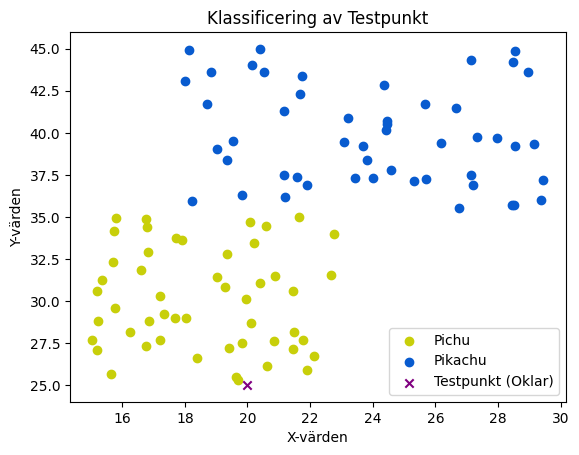

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial import distance
import numpy as np

def read_data(pokemon_clean):
    x_values = []
    y_values = []
    labels = []

    label_to_code = {}  # En dictionary för att kartlägga etiketter till numeriska koder
    code_counter = 1  # En räknare för att tilldela unika koder till varje etikett

    with open(pokemon_clean, 'r') as pokemon_cleaned:
        for line in pokemon_cleaned:
            # Tar bort parenteser och radbrytningar och splittar vid ,-tecken
            line = line.strip('()\n ')
            values = line.split(',')

            # Kontrollerar om raden innehåller exakt två värden
            if len(values) >= 2:
                x, y = map(float, values[:2])  # Tar ut de första två värdena (x, y) med två decimaler.
                x_values.append(x)
                y_values.append(y)

                # Finns tre värden så läggs etiketten (pokemón typ) till.
                if len(values) == 3:
                    label = values[2].strip()

                    # Kolla om etiketten redan har en tilldelad kod, annars tilldela en ny kod
                    if label not in label_to_code:
                        label_to_code[label] = code_counter
                        code_counter += 1

                    labels.append(label_to_code[label])

    # Används för att skapa tuples med dessa tre variabler.
    # Dessa variabler används sedan för att hämta x-värden, y-värden och etiketter för Pichu, Pikachu och testpunkter i resten av koden.
    return np.array(x_values), np.array(y_values), np.array(labels)

def classify_sample(test_point, training_data_x, training_data_y, training_data_labels):
    # Skapar en array med koordinaterna för träningsdatan och skapar en 2D array
    training_data_points = np.column_stack((training_data_x, training_data_y, training_data_labels))

    # Skapa en array med koordinaterna för testpunkten
    test_point_array = np.array([test_point[0], test_point[1]])

    # cdist beräknar avståndet mellan testpunkten och all träningsdata
    distances = distance.cdist(test_point_array.reshape(1, -1), training_data_points[:, :2])

    # Sortera avstånden och välj de fem närmaste punkterna
    closest_indices = np.argsort(distances)[0][:5]

    # Hämta etiketterna för de närmaste punkterna
    closest_labels = training_data_points[closest_indices, 2]

    # Avgör majoritetsklassen baserat på de fem närmaste punkterna
    unique_labels, counts = np.unique(closest_labels, return_counts=True)
    majority_label = unique_labels[np.argmax(counts)]

    return majority_label

# Läser in data för Pichu och Pikachu filerna
pichu_x, pichu_y, pichu_label = read_data("../data/pichu_cleanedup.txt")
pikachu_x, pikachu_y, pikachu_label = read_data("../data/pikachu_cleanedup.txt")

# Låt användaren mata in en testpunkt
while True:
    try:
        x = float(input("Ange x-koordinat för testpunkten: "))
        y = float(input("Ange y-koordinat för testpunkten: "))
        test_point = (x, y)
        break
    except ValueError:
        print("Felaktig inmatning. Ange giltiga numeriska värden.")

# Klassificera testpunkten
pichu_classification = classify_sample(test_point, pichu_x, pichu_y, pichu_label)
pikachu_classification = classify_sample(test_point, pikachu_x, pikachu_y, pikachu_label)


# Skapa en matplotlib-figur
#plt.figure(figsize=(8, 6))

# Plotta Pichu och Pikachu punkterna
plt.scatter(pichu_x, pichu_y, label="Pichu", color='#c8cf0a')
plt.scatter(pikachu_x, pikachu_y, label="Pikachu", color='#085bcf')


# Plotta testpunkten med en annan färg beroende på klassificeringen
if pichu_classification == "Pichu":
    plt.scatter(x, y, label="Testpunkt (Pichu)", color='g', marker='x')
elif pikachu_classification == "Pikachu":
    plt.scatter(x, y, label="Testpunkt (Pikachu)", color='r', marker='x')
else:
    plt.scatter(x, y, label="Testpunkt (Oklar)", color='purple', marker='x')


# Sätta titel och etiketter för axlarna
plt.title("Klassificering av Testpunkt")
plt.xlabel("X-värden")
plt.ylabel("Y-värden")

# Lägg till en legend
plt.legend()

# Visa figuren
plt.show()


79
30.4
51.6
33.8
27.6